<a href="https://colab.research.google.com/github/tackulus/204383/blob/main/Code05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **05 Adding Noise**

> **204383 Image Processing** 

---

> **Tocktack | Kasidis Torcharoen (610510531)** \\
**Top | Kittisak Thammawong (610510611)**

In [1]:
import numpy as np
import cv2 as cv 
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pylab as plt

In [2]:
url = "https://raw.githubusercontent.com/tackulus/204383/main/image/0302.jpg"

image = io.imread(url)
image = cv.resize(image, (512, 288))
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

## **Method 1 : Gaussian noise**

---

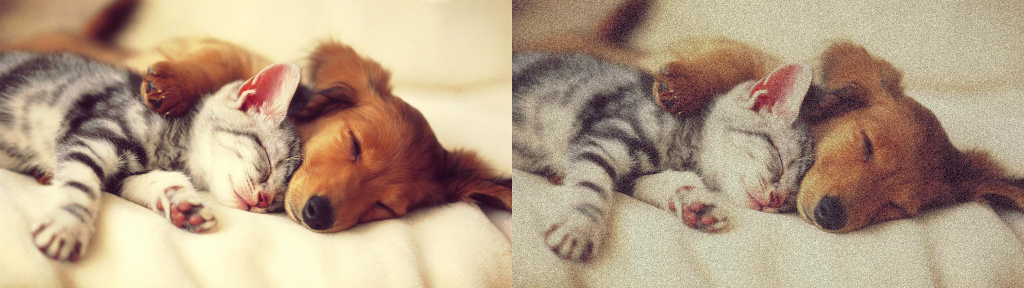

In [3]:
def gaussian(image, mean=0, stddev=16):
    
    if image.ndim == 2: 
        image = np.expand_dims(image, axis=2)
    row, col, ch = image.shape
    noisy = np.zeros_like(image, np.float32)

    gauss = np.random.normal(mean, stddev, (row, col))
    for c in range(ch): 
        noisy[:, :, c] = image[:, :, c] + gauss

    cv.normalize(noisy, noisy, 0, 255, cv.NORM_MINMAX, dtype=-1)
    
    return noisy.astype("uint8")

noisy = gaussian(image)
frame = cv.hconcat((image, noisy))
cv2_imshow(frame)

## **Method 2 : Salt-pepper noise**

---

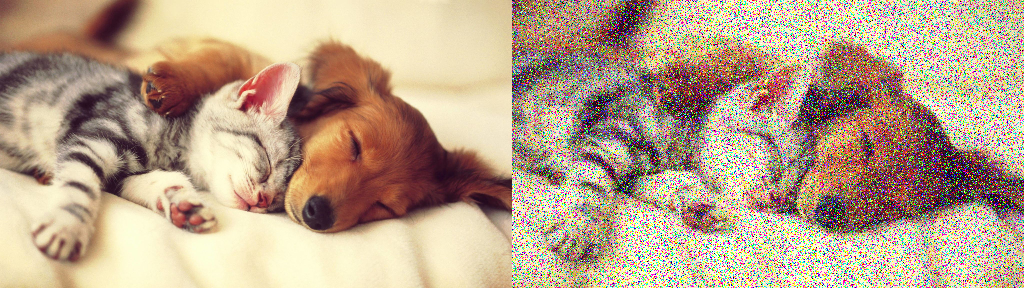

In [4]:
def salt_pepper(image, s_ratio=0.5, sp_ratio=0.15):

    if image.ndim == 2: 
        image = np.expand_dims(image, axis=2)
    row, col, ch = image.shape
    noisy = np.copy(image)

    for c in range(ch):
        for i in range(row):
            for j in range(col):
                rnd = np.random.random()
                if rnd > sp_ratio: pass
                elif rnd < sp_ratio * s_ratio: 
                    noisy[i,j,c] = 255
                else:
                    noisy[i,j,c] = 0
    
    return noisy.astype("uint8")

noisy = salt_pepper(image, sp_ratio=0.30)
frame = cv.hconcat((image, noisy))
cv2_imshow(frame)

## **Method 3 : Poisson noise**

---

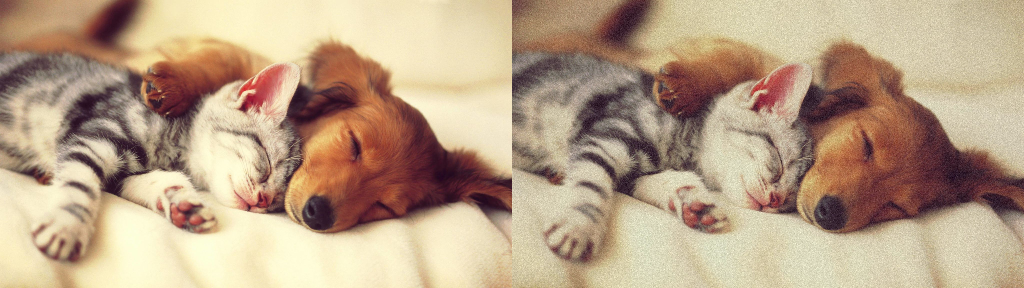

In [5]:
def poisson(image, lam=100):
    
    if image.ndim == 2: 
        image = np.expand_dims(image, axis=2)
    row, col, ch = image.shape
    noisy = np.zeros_like(image, np.float32)

    poisson = np.random.poisson(lam, size=(row, col))
    for c in range(ch): 
        noisy[:, :, c] = image[:, :, c] + poisson

    cv.normalize(noisy, noisy, 0, 255, cv.NORM_MINMAX, dtype=-1)
    
    return noisy.astype("uint8")

noisy = poisson(image)
frame = cv.hconcat((image, noisy))
cv2_imshow(frame)

## **Method 4 : Speckle noise**

---

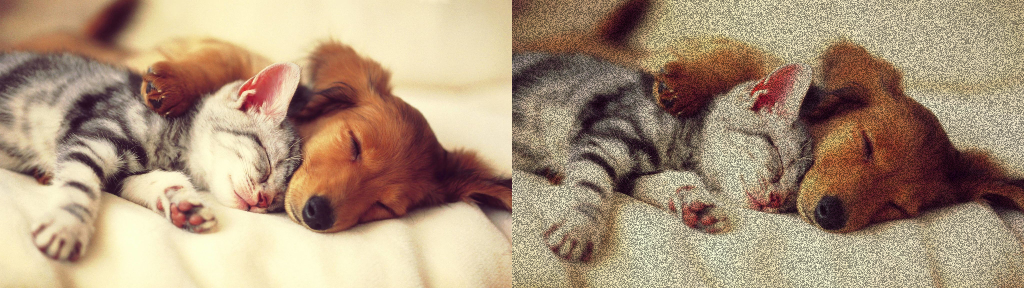

In [6]:
def speckle(image, mean=0, stddev=1):
    
    if image.ndim == 2: 
        image = np.expand_dims(image, axis=2)
    row, col, ch = image.shape
    noisy = np.zeros_like(image, np.float32)

    gauss = np.random.random((row, col))
    for c in range(ch): 
        noisy[:, :, c] = image[:, :, c] + image[:, :, c] * gauss

    cv.normalize(noisy, noisy, 0, 255, cv.NORM_MINMAX, dtype=-1)

    return noisy.astype("uint8")

noisy = speckle(image)
frame = cv.hconcat((image, noisy))
cv2_imshow(frame)